In [68]:
import pandas as pd 
import numpy as np
from os.path import join
import statsmodels.api as sm
import seaborn as sns
import warnings
from sec_api import QueryApi
from sec_api import ExtractorApi

warnings.filterwarnings("ignore")
RAW_DATA_PATH = 'C:/Users/Lenovo/OneDrive - The Chinese University of Hong Kong/lrl_study/cuhk_dmdp/summer quarter/ds/project'  # raw data save path

In [70]:
# import s&p rating data
df_SP_rating = pd.read_csv(join(RAW_DATA_PATH, 'rating_2010_2011_sp1.csv'))
# eliminate forecasts with missing announcement dates, gvkey and ranking

df_SP_rating = df_SP_rating.dropna(subset=['gvkey','splticrm','datadate'], how='any')

df_SP_rating[['year']]=pd.to_datetime(df_SP_rating['datadate']).dt.year
df_SP_rating=df_SP_rating.drop_duplicates(['gvkey', 'year'], keep='last')
df_SP_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 23 to 137006
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     2103 non-null   int64  
 1   splticrm  2103 non-null   object 
 2   spsdrm    0 non-null      float64
 3   datadate  2103 non-null   object 
 4   cik       2042 non-null   float64
 5   conm      2100 non-null   object 
 6   tic       2100 non-null   object 
 7   cusip     2100 non-null   object 
 8   year      2103 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 164.3+ KB


In [71]:
#import financial ratio data
# import s&p rating data
df_financial_ratio = pd.read_csv(join(RAW_DATA_PATH, 'financial ratio.csv'))
# eliminate forecasts with missing announcement dates, gvkey and ranking
df_financial_ratio = df_financial_ratio.dropna(subset=['gvkey','public_date'], how='any')
#creat a variable called year for later merging data
df_financial_ratio[['year']]=pd.to_datetime(df_financial_ratio['public_date']).dt.year
df_financial_ratio=df_financial_ratio.drop_duplicates(['gvkey', 'year'], keep='last') 
df_financial_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8036 entries, 11 to 51274
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            8036 non-null   int64  
 1   permno           8036 non-null   int64  
 2   adate            8014 non-null   object 
 3   qdate            8036 non-null   object 
 4   public_date      8036 non-null   object 
 5   CAPEI            7873 non-null   float64
 6   bm               7774 non-null   float64
 7   evm              7993 non-null   float64
 8   pe_op_basic      7709 non-null   float64
 9   pe_op_dil        7713 non-null   float64
 10  pe_exi           7730 non-null   float64
 11  pe_inc           7730 non-null   float64
 12  ps               7901 non-null   float64
 13  pcf              8006 non-null   float64
 14  dpr              5639 non-null   float64
 15  npm              7900 non-null   float64
 16  opmbd            7900 non-null   float64
 17  opmad       

In [72]:
#creat veariable for corresponding year and merge with respect to year and compnay gvkey
#check duplicate
df_merged=df_financial_ratio.merge(df_SP_rating, on =['gvkey','year'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1115
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            1116 non-null   int64  
 1   permno           1116 non-null   int64  
 2   adate            1116 non-null   object 
 3   qdate            1116 non-null   object 
 4   public_date      1116 non-null   object 
 5   CAPEI            1112 non-null   float64
 6   bm               1058 non-null   float64
 7   evm              1111 non-null   float64
 8   pe_op_basic      1083 non-null   float64
 9   pe_op_dil        1083 non-null   float64
 10  pe_exi           1081 non-null   float64
 11  pe_inc           1082 non-null   float64
 12  ps               1116 non-null   float64
 13  pcf              1115 non-null   float64
 14  dpr              941 non-null    float64
 15  npm              1116 non-null   float64
 16  opmbd            1116 non-null   float64
 17  opmad         

In [73]:
df_merged.head()

gvkey  permno       adate       qdate public_date   CAPEI     bm     evm  \
0   1004   54594  2010-05-31  2010-08-31  2010-12-31  19.866  1.343  10.679   
1   1045   21020  2009-12-31  2010-09-30  2010-12-31  -3.303    NaN  13.901   
2   1075   27991  2009-12-31  2010-09-30  2010-12-31  16.841  1.245   6.993   
3   1078   20482  2009-12-31  2010-09-30  2010-12-31  18.933  0.265   9.554   
4   1161   61241  2009-12-31  2010-09-30  2010-12-31  -5.853  0.127   9.139   

   pe_op_basic  pe_op_dil  ...  TICKER   cusip_x  year  splticrm  spsdrm  \
0       19.076     19.345  ...     AIR  00036110  2010        BB     NaN   
1       -4.211     -4.211  ...     AMR  00176510  2010        B-     NaN   
2       14.493     14.544  ...     PNW  72348410  2010      BBB-     NaN   
3       11.714     11.800  ...     ABT  00282410  2010        AA     NaN   
4      -26.387    -16.360  ...     AMD  00790310  2010        B+     NaN   

     datadate       cik                         conm  tic    cusip_y  
0  2010-12-31    1750.0                     AAR CORP  AIR  000361105  
1  2010-12-31    6201.0  AMERICAN AIRLINES GROUP INC  AAL  02376R102  
2  2010-12-31  764622.0   PINNACLE WEST CAPITAL CORP  PNW  723484101  
3  2010-12-31    1800.0          ABBOTT LABORATORIES  ABT  002824100  
4  2010-12-31    2488.0       ADVANCED MICRO DEVICES  AMD  007903107  

[5 rows x 86 columns]

## data exploration

here I will firsly start to look at the dependent variable

BBB     265
BBB-    251
BB-     234
B+      233
B       217
BB      177
BBB+    174
A       129
BB+     129
A-      124
B-       75
A+       60
CCC+     30
AA-      28
AA       14
AAA       8
D         8
AA+       6
CCC-      3
CC        2
CCC       2
Name: splticrm, dtype: int64


<AxesSubplot:xlabel='splticrm', ylabel='count'>

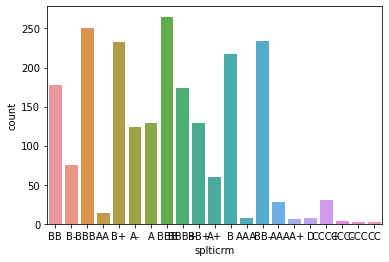

In [13]:
# Re-examine output/target/label (i.e., "HumanOrLightning") variable based on our previous observation, anything wrong with it? 
df_merged["splticrm"].unique()
# Examine the total cases for each value in our target variable 
# fire_subset["HumanOrLightning"].value_counts()
print(df_merged["splticrm"].value_counts())

# Do you think it is a imbalanced variable? To be learned later :)

# Visualize output variable 
sns.countplot(df_merged["splticrm"], label = "Count")

In [14]:
{
    "query": {
        "query_string": {
            "query": "formType:\"10-Q\""
        }
    },
    "from": "0",
    "size": "20",
    "sort": [{ "filedAt": { "order": "desc" } }]
}

{'query': {'query_string': {'query': 'formType:"10-Q"'}},
 'from': '0',
 'size': '20',
 'sort': [{'filedAt': {'order': 'desc'}}]}

In [15]:
#unfortunately, this api has some cost so I will take another approach
API_KEY = '96a13363ba305c2f469a5568df62be7c97272a28c948994c147151be487b3ee9'
extractorApi = ExtractorApi(API_KEY)
# URL of Tesla's 10-K filing
filing_10_k_url = 'https://www.sec.gov/Archives/edgar/data/1318605/000156459021004599/tsla-10k_20201231.htm'

# extract text section "Item 1 - Business" from 10-K
item_1_text = extractorApi.get_section(filing_10_k_url, '1', 'text')


item_1_text

' ITEM 1. \n\nBUSINESS\n\n##TABLE_END\n\nOverview \n\nWe design, develop, manufacture, sell and lease high-performance fully electric vehicles and energy generation and storage systems, and offer services related to our sustainable energy products. We generally sell our products directly to customers, including through our website and retail locations. We also continue to grow our customer-facing infrastructure through a global network of vehicle service centers, Mobile Service technicians, body shops, Supercharger stations and Destination Chargers to accelerate the widespread adoption of our products. We emphasize performance, attractive styling and the safety of our users and workforce in the design and manufacture of our products and are continuing to develop full self-driving technology for improved safety. We also strive to lower the cost of ownership for our customers through continuous efforts to reduce manufacturing costs and by offering financial services tailored to our produ

In [43]:
#start to load all 10k fillings
import os
from pathlib import Path
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Specify the directory path
directory = 'C:/Users/Lenovo/Desktop/10-X_C_2006-2010/QTR1'
os.chdir(directory)

# Get all file names in the directory
file_names =pd.DataFrame(os.listdir(directory))[:5]
file_names.head()

0
0  20100104_10-K-A_edgar_data_1314772_0001104659-...
1  20100104_10-K-A_edgar_data_1435224_0001165527-...
2  20100104_10-K_edgar_data_1088787_0001448788-09...
3  20100104_10-K_edgar_data_12040_0000914317-10-0...
4  20100104_10-K_edgar_data_1385329_0001062993-10...

In [45]:
def getFillingInfo(file_name):#this function is to get the information part of the file title
    name_parts = file_name.split('_')
    res=[name_parts[0],name_parts[1],name_parts[4]]
    return res
def year(date):#this function is to get the information part of the file title
    year=date[:4]
    return year

In [60]:
df=pd.DataFrame(file_names.iloc[:,0].apply(getFillingInfo))
df[['date', 'type', 'CIK']] = df.iloc[:,0].apply(pd.Series)
df['year'] = df['date'].apply(year)
df=df.iloc[:,1:]
df['path'] = file_names
df=df[df['type']=="10-K"].reset_index(drop=True)
print(df)

       date  type      CIK  year  \
0  20100104  10-K  1088787  2010   
1  20100104  10-K    12040  2010   
2  20100104  10-K  1385329  2010   

                                                path  
0  20100104_10-K_edgar_data_1088787_0001448788-09...  
1  20100104_10-K_edgar_data_12040_0000914317-10-0...  
2  20100104_10-K_edgar_data_1385329_0001062993-10...  


In [61]:
def readtxt(file_path):
    file_path=Path(file_path)
    text = file_path.read_text()
    text=text.replace("\n", " ")
    text=text.replace("\'s", "")#remove 's
    text=re.sub(r'\s+', ' ', text)#remove multiplr space
    text = re.sub( r'\d+', '', text)#remove numbers
    text=text.replace("-", "")#remove 's
    text=text.lower()
    return text
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [62]:
df['txt']=df['path'].apply(readtxt)
df

date  type      CIK  year  \
0  20100104  10-K  1088787  2010   
1  20100104  10-K    12040  2010   
2  20100104  10-K  1385329  2010   

                                                path  \
0  20100104_10-K_edgar_data_1088787_0001448788-09...   
1  20100104_10-K_edgar_data_12040_0000914317-10-0...   
2  20100104_10-K_edgar_data_1385329_0001062993-10...   

                                                 txt  
0  <header> <filestats> <filename>_k_edgar_data__...  
1  <header> <filestats> <filename>_k_edgar_data__...  
2  <header> <filestats> <filename>_k_edgar_data__...

In [63]:
def getcontent(text):
    text_new = text[text.index('table of content'):]
    return text_new
df['txt'] = df['txt'].apply(getcontent)
df

date  type      CIK  year  \
0  20100104  10-K  1088787  2010   
1  20100104  10-K    12040  2010   
2  20100104  10-K  1385329  2010   

                                                path  \
0  20100104_10-K_edgar_data_1088787_0001448788-09...   
1  20100104_10-K_edgar_data_12040_0000914317-10-0...   
2  20100104_10-K_edgar_data_1385329_0001062993-10...   

                                                 txt  
0  table of contents part i item . business.  ite...  
1  table of contents part i . item  business  ite...  
2  table of contents item . business  item a. ris...

In [64]:
df['txt']=df['txt'].apply(preprocess_text)
df

date  type      CIK  year  \
0  20100104  10-K  1088787  2010   
1  20100104  10-K    12040  2010   
2  20100104  10-K  1385329  2010   

                                                path  \
0  20100104_10-K_edgar_data_1088787_0001448788-09...   
1  20100104_10-K_edgar_data_12040_0000914317-10-0...   
2  20100104_10-K_edgar_data_1385329_0001062993-10...   

                                                 txt  
0  table content part item . business . item a. r...  
1  table content part . item business item risk f...  
2  table content item . business item a. risk fac...

In [65]:
documents = df['txt'].tolist()
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names()

vectorizer2 = TfidfVectorizer()
tfidf = vectorizer2.fit_transform(documents)
feature_names2 = vectorizer2.get_feature_names()

In [67]:
# Convert bag_of_words to a pandas DataFrame
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

# View the bag_of_words DataFrame
new_columns = ['w_' + col for col in bag_of_words_df]
bag_of_words_df.columns = new_columns
print(bag_of_words_df)
df=df.join(bag_of_words_df)
print(df)

   w_aa  w_ability  w_able  w_abroad  w_absence  w_absent  w_absolute  \
0     0         30      10         3          1         2           2   
1     2         10      10         0          0         0           0   
2     0         14      22         0          0         0           1   

   w_absorb  w_absorbed  w_abstract  ...  w_zhao  w_zhongmen  w_zhou  w_zhu  \
0         0           2           1  ...      17           3       1      6   
1         0           0           0  ...       0           0       0      0   
2         2           0           0  ...       0           0       0      0   

   w_zhuang  w_zhuqian  w_zinc  w_zincrelated  w_zone  w_zoning  
0         1          2      42              2       1         0  
1         0          0       0              0       0         5  
2         0          0       2              0       4         0  

[3 rows x 3907 columns]
       date  type      CIK  year  \
0  20100104  10-K  1088787  2010   
1  20100104  10-K    12040  2

In [25]:
tfidf_df = pd.DataFrame(tfidf.toarray(),columns=feature_names2)
print(tfidf_df)

         aa   ability      able    abroad   absence    absent  absolute  \
0  0.000000  0.016459  0.005486  0.002787  0.000929  0.001858  0.001413   
1  0.002772  0.008187  0.008187  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.019369  0.030437  0.000000  0.000000  0.000000  0.001782   

     absorb  absorbed  abstract  ...      zhao  zhongmen      zhou       zhu  \
0  0.000000  0.001858  0.000929  ...  0.015792  0.002787  0.000929  0.005574   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.004685  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

     zhuang   zhuqian      zinc  zincrelated      zone    zoning  
0  0.000929  0.001858  0.029672     0.001858  0.000706  0.000000  
1  0.000000  0.000000  0.000000     0.000000  0.000000  0.006931  
2  0.000000  0.000000  0.003563     0.000000  0.007126  0.000000  

[3 rows x 3907 columns]


In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['txt'], 30)
common_words


[('financial', 706),
 ('company', 610),
 ('year', 513),
 ('september', 498),
 ('statement', 467),
 ('magnesium', 448),
 ('operation', 430),
 ('stock', 426),
 ('share', 389),
 ('fiscal', 386),
 ('limited', 331),
 ('restaurant', 324),
 ('cash', 321),
 ('common', 311),
 ('consolidated', 304),
 ('china', 302),
 ('sale', 301),
 ('security', 298),
 ('cost', 280),
 ('period', 276),
 ('income', 270),
 ('december', 266),
 ('asset', 264),
 ('management', 260),
 ('business', 257),
 ('note', 257),
 ('related', 252),
 ('partnership', 252),
 ('result', 241),
 ('report', 238)]

In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['txt'], 40)
common_words

[('financial statement', 317),
 ('fiscal year', 284),
 ('limited partnership', 248),
 ('common stock', 211),
 ('consolidated financial', 200),
 ('year ended', 133),
 ('ended september', 126),
 ('fair value', 124),
 ('financial reporting', 121),
 ('internal control', 118),
 ('transition period', 116),
 ('china direct', 113),
 ('per share', 100),
 ('executive officer', 99),
 ('control financial', 99),
 ('related party', 98),
 ('package liquor', 97),
 ('september december', 91),
 ('liquor store', 89),
 ('co ltd', 88),
 ('share common', 88),
 ('result operation', 87),
 ('table content', 85),
 ('board director', 84),
 ('note consolidated', 84),
 ('report form', 81),
 ('cash flow', 78),
 ('nine month', 77),
 ('common share', 75),
 ('marketable security', 74),
 ('income tax', 73),
 ('net income', 72),
 ('direct industry', 71),
 ('discontinued operation', 71),
 ('mineral property', 71),
 ('asia magnesium', 67),
 ('preferred stock', 66),
 ('industry inc', 63),
 ('financial condition', 62),
 ('i

In [28]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['txt'], 20)
common_words

[('consolidated financial statement', 186),
 ('internal control financial', 99),
 ('control financial reporting', 99),
 ('package liquor store', 89),
 ('year ended september', 88),
 ('share common stock', 88),
 ('note consolidated financial', 84),
 ('china direct industry', 71),
 ('direct industry inc', 63),
 ('incorporated herein reference', 61),
 ('seafood bar grill', 56),
 ('pan asia magnesium', 55),
 ('flanigan seafood bar', 54),
 ('first nine month', 53),
 ('flanigan enterprise inc', 51),
 ('herein reference exhibit', 50),
 ('chief executive officer', 46),
 ('form filed commission', 46),
 ('marketable security available', 43),
 ('silverstar mining corp', 41)]

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# this is not a test 

In [1]:
import pandas as pd 
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

### 1.Description of the dataset

- splticrm: The Global Company Key or GVKEY is a unique six-digit number key assigned to each company (issue, currency, index) in the Capital IQ Compustat database.
- splticrm: S&P Domestic Long Term Issuer Credit Rating

### 2.Load the Data

In [3]:
# import s&p rating data
df_SP_rating = pd.read_csv('rating_2010_2011_sp.csv')
# eliminate forecasts with missing announcement dates, gvkey and ranking

df_SP_rating = df_SP_rating.dropna(subset=['gvkey','splticrm','datadate'], how = 'any')

df_SP_rating['year'] = pd.to_datetime(df_SP_rating['datadate']).dt.year #convert to pandas datetime format
df_SP_rating = df_SP_rating.drop_duplicates(['gvkey', 'year'], keep = 'last')

df_SP_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091 entries, 24 to 148281
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gvkey     4091 non-null   int64 
 1   splticrm  4091 non-null   object
 2   datadate  4091 non-null   object
 3   conm      4085 non-null   object
 4   tic       4085 non-null   object
 5   cusip     4085 non-null   object
 6   year      4091 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 255.7+ KB


In [4]:
# import s&p rating data
df_SP_rating = pd.read_csv('rating_2010_2011_sp.csv')
# eliminate forecasts with missing announcement dates, gvkey and ranking

df_SP_rating = df_SP_rating.dropna(subset=['gvkey','splticrm','datadate'], how = 'any')

df_SP_rating['year'] = pd.to_datetime(df_SP_rating['datadate']).dt.year #convert to pandas datetime format
df_SP_rating = df_SP_rating.drop_duplicates(['gvkey', 'year'], keep = 'last')

df_SP_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091 entries, 24 to 148281
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gvkey     4091 non-null   int64 
 1   splticrm  4091 non-null   object
 2   datadate  4091 non-null   object
 3   conm      4085 non-null   object
 4   tic       4085 non-null   object
 5   cusip     4085 non-null   object
 6   year      4091 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 255.7+ KB


In [5]:
# import financial ratio data
df_financial_ratio = pd.read_csv('financial ratio.csv')

# eliminate forecasts with missing announcement dates, gvkey and ranking
df_financial_ratio = df_financial_ratio.dropna(subset=['gvkey','public_date'], how = 'any')

# creat a variable called year for later merging data
df_financial_ratio['year'] = pd.to_datetime(df_financial_ratio['public_date']).dt.year
df_financial_ratio=df_financial_ratio.drop_duplicates(['gvkey', 'year'], keep = 'last') 
df_financial_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8036 entries, 11 to 51274
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            8036 non-null   int64  
 1   permno           8036 non-null   int64  
 2   adate            8014 non-null   object 
 3   qdate            8036 non-null   object 
 4   public_date      8036 non-null   object 
 5   CAPEI            7873 non-null   float64
 6   bm               7774 non-null   float64
 7   evm              7993 non-null   float64
 8   pe_op_basic      7709 non-null   float64
 9   pe_op_dil        7713 non-null   float64
 10  pe_exi           7730 non-null   float64
 11  pe_inc           7730 non-null   float64
 12  ps               7901 non-null   float64
 13  pcf              8006 non-null   float64
 14  dpr              5639 non-null   float64
 15  npm              7900 non-null   float64
 16  opmbd            7900 non-null   float64
 17  opmad       

In [6]:
#creat veariable for corresponding year and merge with respect to year and compnay gvkey
df_merged = df_financial_ratio.merge(df_SP_rating, on = ['gvkey','year']) #default merge method is "inner"
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2168
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            2169 non-null   int64  
 1   permno           2169 non-null   int64  
 2   adate            2168 non-null   object 
 3   qdate            2169 non-null   object 
 4   public_date      2169 non-null   object 
 5   CAPEI            2160 non-null   float64
 6   bm               2060 non-null   float64
 7   evm              2158 non-null   float64
 8   pe_op_basic      2117 non-null   float64
 9   pe_op_dil        2117 non-null   float64
 10  pe_exi           2113 non-null   float64
 11  pe_inc           2115 non-null   float64
 12  ps               2168 non-null   float64
 13  pcf              2165 non-null   float64
 14  dpr              1836 non-null   float64
 15  npm              2168 non-null   float64
 16  opmbd            2168 non-null   float64
 17  opmad         

**Question: Is there any string value that actually numeric among those variables?**

The numeric feature "divyield" is categorized as "object". We have to convert it to "float" type.

In [7]:
df_merged["divyield"] = pd.to_numeric(df_merged["divyield"].str.replace('%', ''), errors='coerce') / 100

In [8]:
print(df_merged['divyield'].info())
df_merged['divyield'].unique()

<class 'pandas.core.series.Series'>
Int64Index: 2169 entries, 0 to 2168
Series name: divyield
Non-Null Count  Dtype  
--------------  -----  
1154 non-null   float64
dtypes: float64(1)
memory usage: 33.9 KB
None


array([    nan, 0.0507 , 0.0516 , 0.0367 , 0.039  , 0.00131, 0.00121,
       0.0216 , 0.0225 , 0.00918, 0.00913, 0.0315 , 0.0314 , 0.0248 ,
       0.0233 , 0.0228 , 0.0078 , 0.00724, 0.00523, 0.00476, 0.0126 ,
       0.0123 , 0.0511 , 0.0168 , 0.0166 , 0.0213 , 0.0208 , 0.0253 ,
       0.0258 , 0.036  , 0.0369 , 0.00611, 0.00589, 0.0234 , 0.0227 ,
       0.00503, 0.0199 , 0.0178 , 0.0015 , 0.00144, 0.0184 , 0.0118 ,
       0.0103 , 0.0491 , 0.048  , 0.0311 , 0.0301 , 0.0189 , 0.019  ,
       0.0303 , 0.0105 , 0.00876, 0.00588, 0.00562, 0.0313 , 0.0298 ,
       0.0119 , 0.0115 , 0.00785, 0.00763, 0.0245 , 0.0256 , 0.0194 ,
       0.0198 , 0.0545 , 0.0547 , 0.0282 , 0.0283 , 0.0175 , 0.0176 ,
       0.00662, 0.0464 , 0.0504 , 0.0479 , 0.0257 , 0.0242 , 0.0379 ,
       0.0392 , 0.0223 , 0.022  , 0.0483 , 0.0524 , 0.0193 , 0.0201 ,
       0.0221 , 0.00267, 0.00251, 0.016  , 0.00109, 0.00095, 0.0161 ,
       0.0147 , 0.0191 , 0.0334 , 0.034  , 0.0204 , 0.0188 , 0.0171 ,
       0.018  , 0.05

In [9]:
# examine if there are any duplicated rows in the data set
df_merged.duplicated().sum()

0

In [10]:
df_merged.head()

gvkey  permno       adate       qdate public_date   CAPEI     bm     evm  \
0   1004   54594  2010-05-31  2010-08-31  2010-12-31  19.866  1.343  10.679   
1   1004   54594  2010-05-31  2010-11-30  2011-01-31  18.877  0.863  11.177   
2   1045   21020  2009-12-31  2010-09-30  2010-12-31  -3.303    NaN  13.901   
3   1045   21020  2009-12-31  2010-09-30  2011-01-31  -2.990    NaN  13.901   
4   1075   27991  2009-12-31  2010-09-30  2010-12-31  16.841  1.245   6.993   

   pe_op_basic  pe_op_dil  ...  PEG_1yrforward  PEG_ltgforward  TICKER  \
0       19.076     19.345  ...           0.776             NaN     AIR   
1       17.625     18.101  ...           0.515             NaN     AIR   
2       -4.211     -4.211  ...          -0.050          -1.208     AMR   
3       -3.811     -3.811  ...          -0.031          -1.093     AMR   
4       14.493     14.544  ...           0.442           2.238     PNW   

    cusip_x  year  splticrm    datadate                         conm  tic  \
0  00036110  2010        BB  2010-12-31                     AAR CORP  AIR   
1  00036110  2011        BB  2011-01-31                     AAR CORP  AIR   
2  00176510  2010        B-  2010-12-31  AMERICAN AIRLINES GROUP INC  AAL   
3  00176510  2011        B-  2011-01-31  AMERICAN AIRLINES GROUP INC  AAL   
4  72348410  2010      BBB-  2010-12-31   PINNACLE WEST CAPITAL CORP  PNW   

     cusip_y  
0  000361105  
1  000361105  
2  02376R102  
3  02376R102  
4  723484101  

[5 rows x 84 columns]

### 3.Explore the Data

In [11]:
credit = df_merged

#### 3.1 Explore the Target Variable

BBB     265
BBB-    251
BB-     234
B+      233
B       217
BB      177
BBB+    174
A       129
BB+     129
A-      124
B-       75
A+       60
CCC+     30
AA-      28
AA       14
AAA       8
D         8
AA+       6
CCC-      3
CCC       2
CC        2
Name: splticrm, dtype: int64


<AxesSubplot:xlabel='splticrm', ylabel='count'>

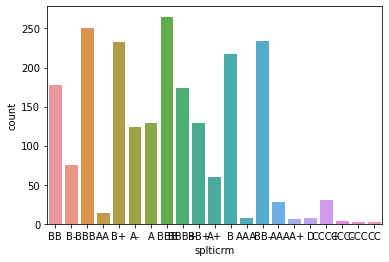

In [12]:
# "splticrm" is our dependent variable
# Examine the total cases for each value in our target variable
credit["splticrm"].unique()
print(credit["splticrm"].value_counts())


# Visualize output variable 
sns.countplot(credit["splticrm"], label = "Count")

#### 3.2 Explore the Financial Ratios

- How many kinds of financial ratios in our dataset?

In [13]:
# Get all names of the financial ratios into a list
ratio_name = credit.select_dtypes(include='float').columns.tolist()
len(ratio_name)

71

- Take a look at the value range of those ratios

In [14]:
for ratio in ratio_name:
    print(credit[ratio].agg([min,max]))

min   -7749.70
max    1850.63
Name: CAPEI, dtype: float64
min       0.007
max    5152.550
Name: bm, dtype: float64
min   -421.980
max    774.246
Name: evm, dtype: float64
min   -1928.6
max     747.0
Name: pe_op_basic, dtype: float64
min   -2004.0
max     775.0
Name: pe_op_dil, dtype: float64
min   -1773.0
max     597.0
Name: pe_exi, dtype: float64
min   -1809.500
max     580.667
Name: pe_inc, dtype: float64
min     0.060
max    30.327
Name: ps, dtype: float64
min   -225.440
max    167.211
Name: pcf, dtype: float64
min    -0.990
max    22.824
Name: dpr, dtype: float64
min   -3.867
max    6.037
Name: npm, dtype: float64
min   -5.779
max    0.753
Name: opmbd, dtype: float64
min   -5.826
max    0.687
Name: opmad, dtype: float64
min   -1.501
max    1.000
Name: gpm, dtype: float64
min   -5.150
max    6.213
Name: ptpm, dtype: float64
min   -3.808
max    6.155
Name: cfm, dtype: float64
min   -0.615
max    0.606
Name: roa, dtype: float64
min   -8.199
max    4.523
Name: roe, dtype: float64
min  

We can see the scales of the ratios differ dramatically, which suggests a standardization process otherwise the influence of some ratios will be overestimated.

               npm
splticrm          
A         0.105279
A+        0.136350
A-        0.101742
AA        0.131714
AA+       0.078667
AA-       0.158714
AAA       0.186750
B         0.004023
B+        0.027936
B-        0.046200
BB        0.059028
BB+       0.043101
BB-       0.065464
BBB       0.084189
BBB+      0.106011
BBB-      0.067072
CC       -0.172500
CCC      -1.356000
CCC+     -0.296400
CCC-     -0.409000
D        -0.126500


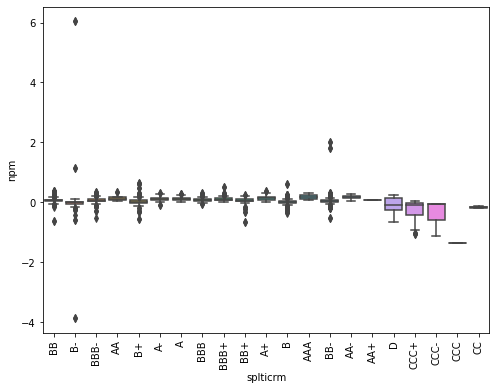

In [15]:
# Examine the relationship between features and target variable

# Examine summary statistics 
print(credit[["npm","splticrm"]].groupby(["splticrm"]).mean())
# Examine a plot 
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="splticrm", y="npm", data = credit)
plt.xticks(rotation=90);

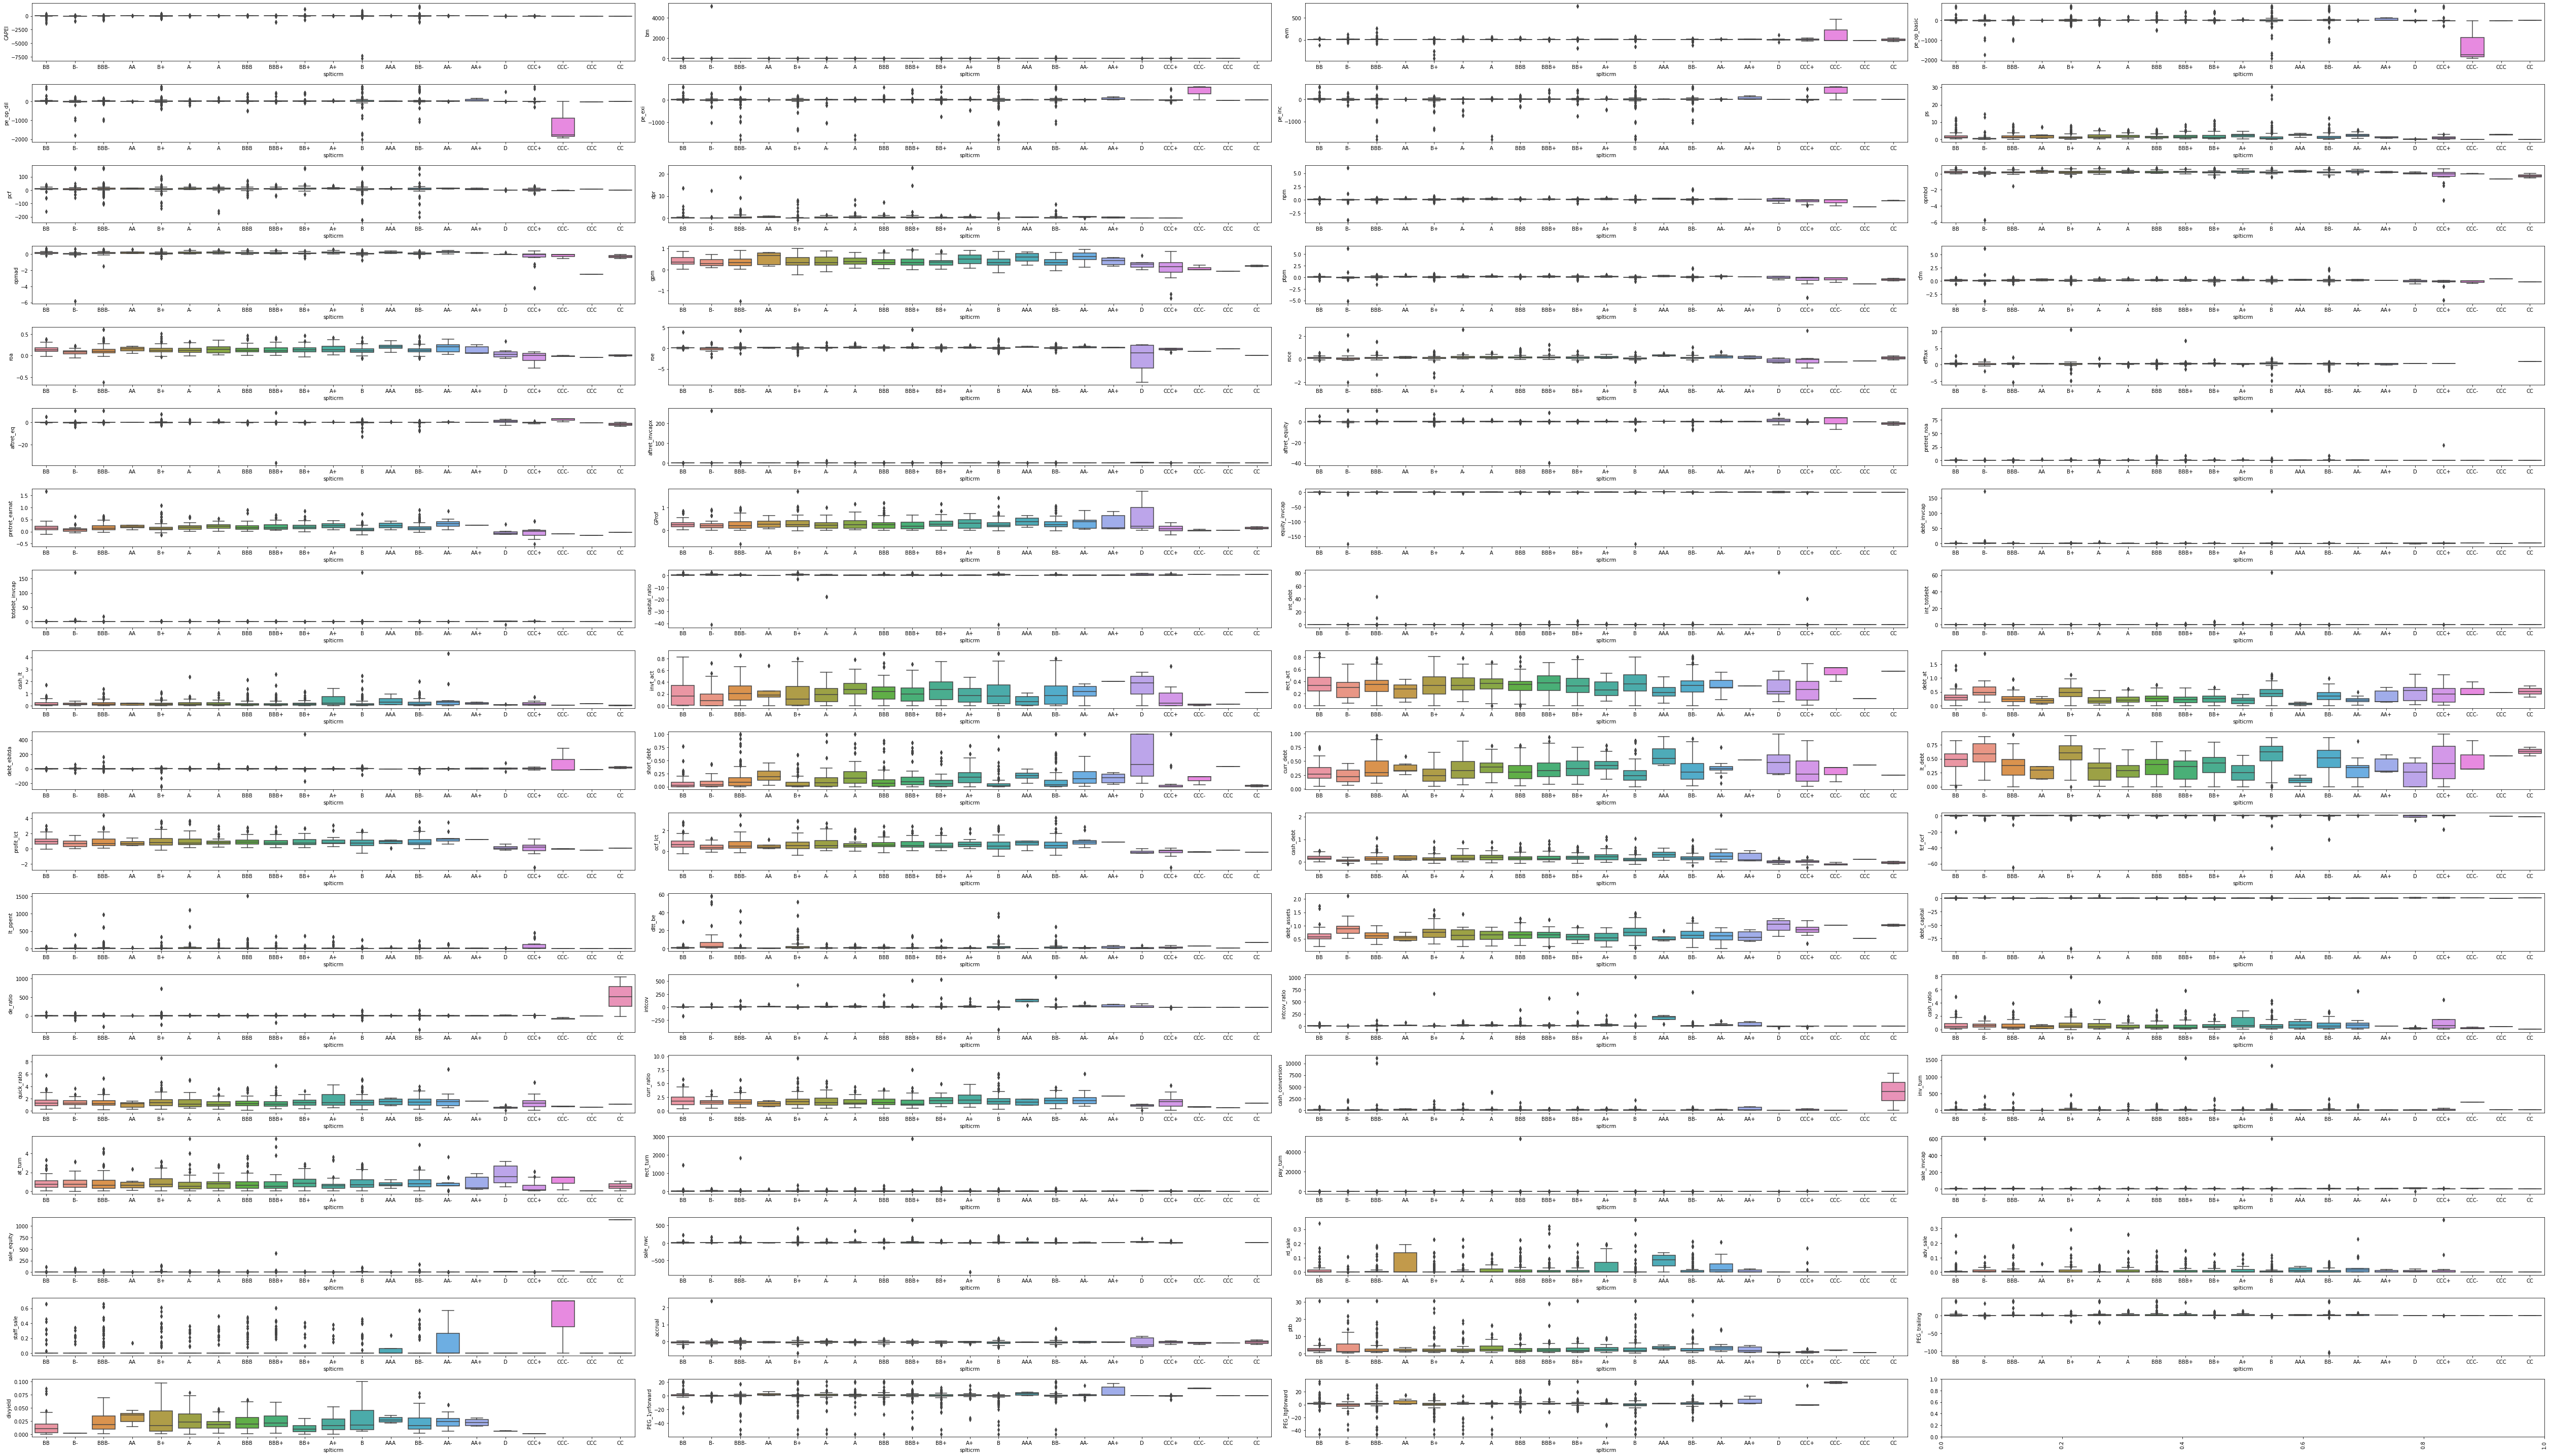

In [16]:
# Examine the relationship between features and target variable

# Define a function to show the relationship features and target variable
def plot_relat(num_feat, h, l): #num_feat is a df.columns containing all the numeric features
    # Create a figure and axis objects for the subplots
    fig, axes = plt.subplots(h, l, figsize=(70, 40))
    # Flatten the axes array
    axes = axes.flatten()
    
    for i, column in enumerate(num_feat):
        sns.boxplot(x="splticrm", y=column, data = credit, ax=axes[i])
        
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.xticks(rotation=90);

#covid_num_feat = covid.describe().iloc[:,1:].columns.tolist()
plot_relat(ratio_name, 18, 4)

<AxesSubplot:xlabel='gpm', ylabel='invt_act'>

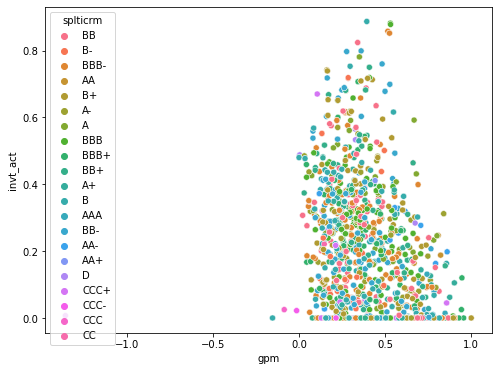

In [17]:
# We can also examine the relationship between multiple numerical input variables and output variable 

plt.figure(figsize=(8, 6))
sns.scatterplot(x = "gpm", y = "invt_act", hue = "splticrm", data = credit)

- Check the distribution

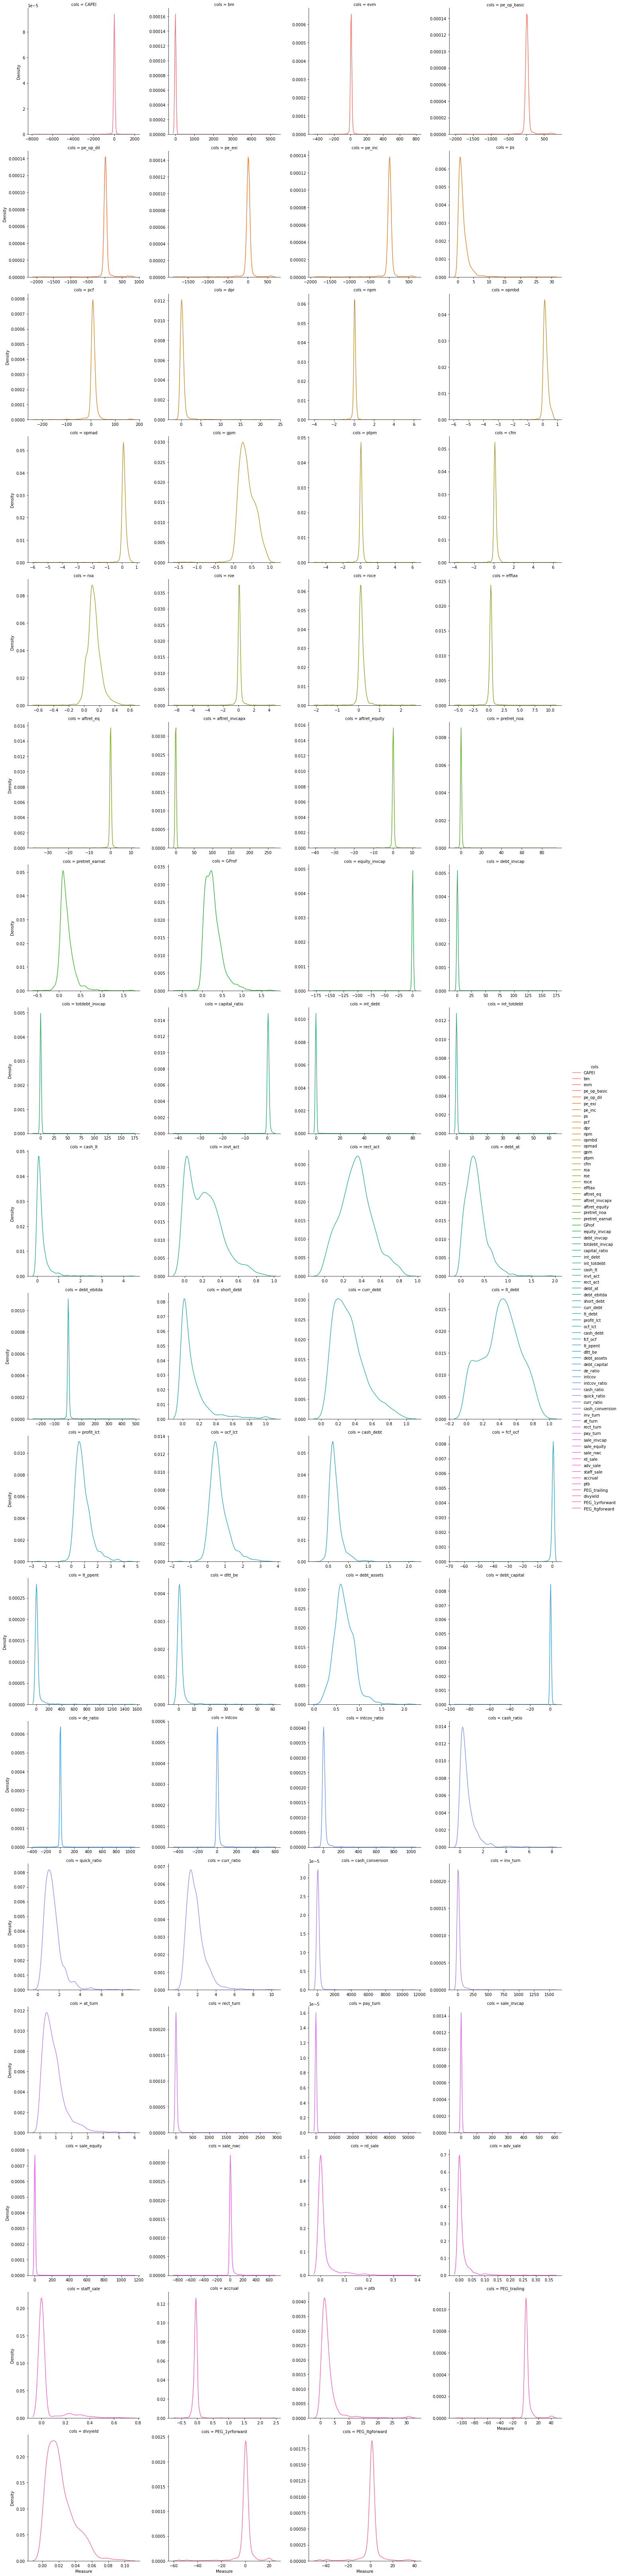

In [18]:
# Examine all numerical variables together 
numericVal = ['float64']
NumFire = credit.select_dtypes(include = numericVal)

# Use melt to change data to long format 
NumFireLong = NumFire.melt(var_name='cols',  value_name='Measure')
NumFireLong.shape
sns.displot(kind='kde', data=NumFireLong, col='cols', col_wrap=4, x='Measure', hue="cols", facet_kws={'sharey': False, 'sharex': False})

- Explore the correlations between all the financial ratios

Correlation Maxtrix

<AxesSubplot:>

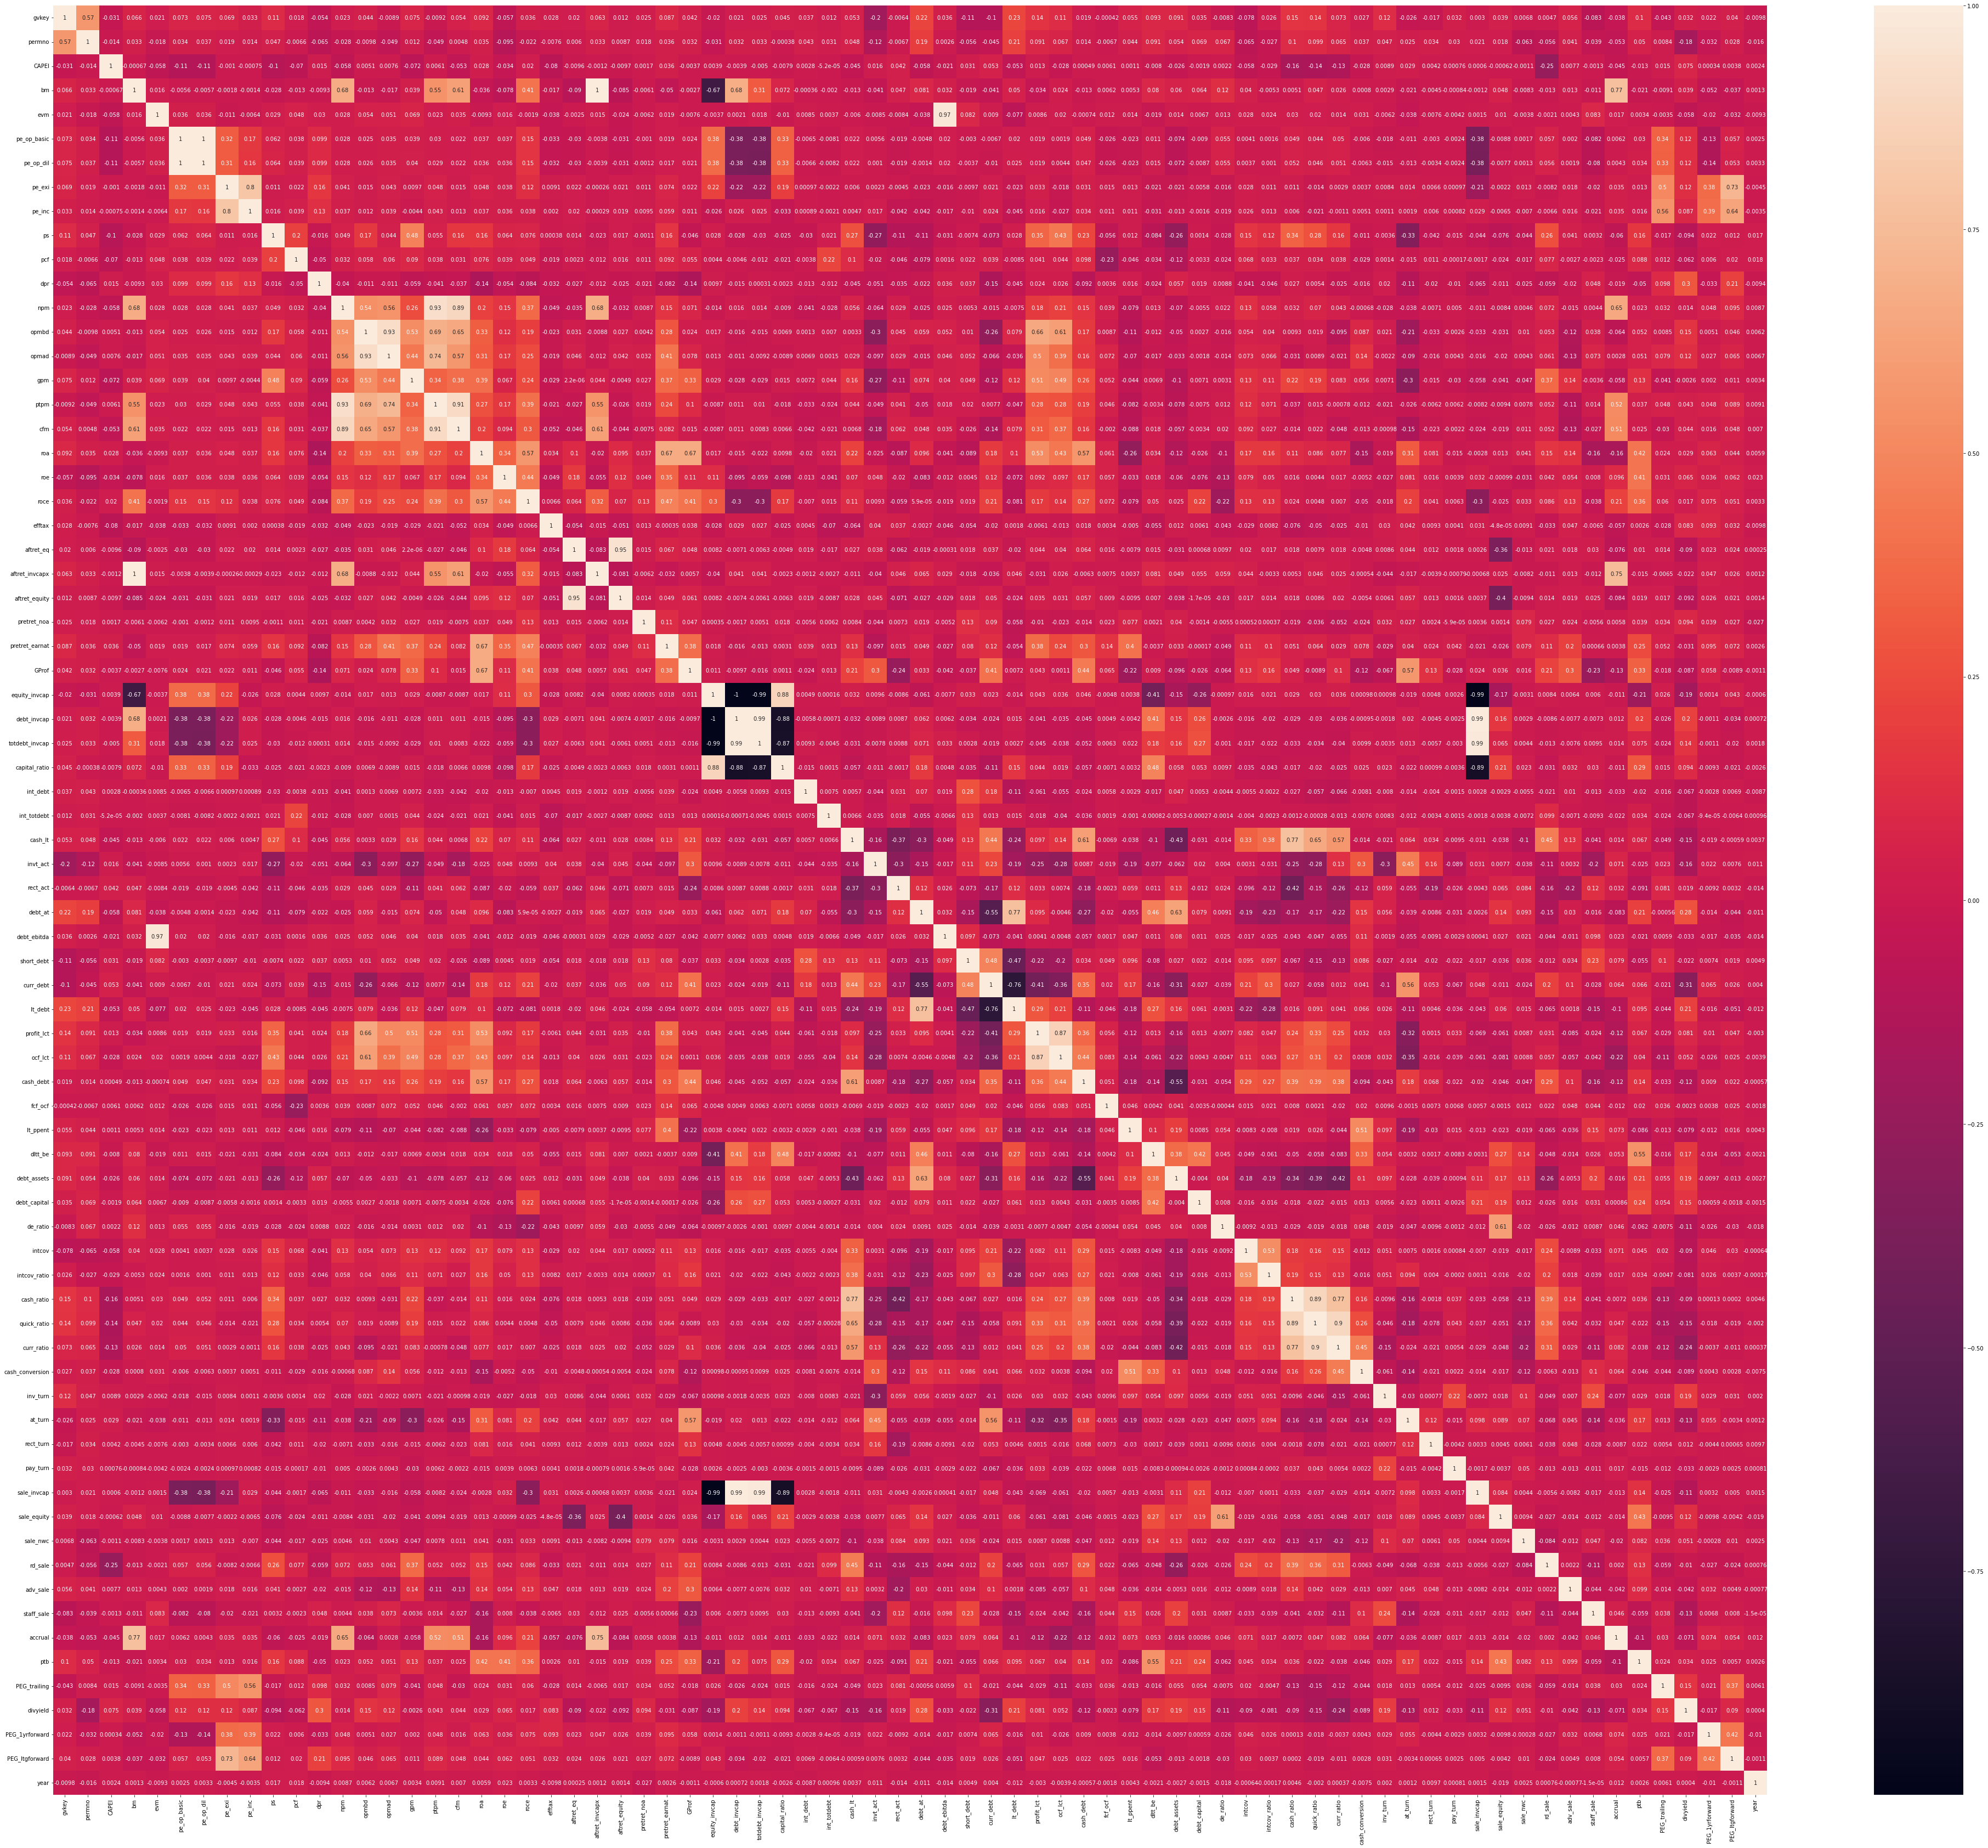

In [19]:
# Create a Correlation matrix to explore relationship between 
# Let's check the correlation between the variables 
plt.figure(figsize=(70,60)) 
sns.heatmap(credit.corr(), annot=True)

**We can see there are some variables have perfect collinearity. For example, the correlation between the variable "pe_op_basic" and the variable "pe_op_dil" equals 1. There are also many variables have quite high correlations. These results indicate there are some overlap among all the 71 financial ratios and we only need to use the ratios that can reveal the most information.**

- Conduct some statistical test to evaluate the relationship

#### 3.3 Handle Missing Values

In [21]:
credit.isnull().sum()

gvkey          0
permno         0
adate          1
qdate          0
public_date    0
              ..
splticrm       0
datadate       0
conm           0
tic            0
cusip_y        0
Length: 84, dtype: int64

In [22]:
# Store all the names of columns containing missing values
missing = credit[ratio_name].columns[credit[ratio_name].isnull().any()].tolist()
print(missing)

['CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'dpr', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce', 'efftax', 'aftret_eq', 'aftret_invcapx', 'aftret_equity', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'int_debt', 'int_totdebt', 'cash_lt', 'invt_act', 'rect_act', 'debt_at', 'debt_ebitda', 'short_debt', 'curr_debt', 'lt_debt', 'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio', 'intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio', 'cash_conversion', 'inv_turn', 'at_turn', 'rect_turn', 'pay_turn', 'sale_invcap', 'sale_equity', 'sale_nwc', 'rd_sale', 'adv_sale', 'staff_sale', 'accrual', 'ptb', 'PEG_trailing', 'divyield', 'PEG_1yrforward', 'PEG_ltgforward']


In [23]:
# Impute the missing values with mode
for i in credit[missing]:
    credit[i] = credit[i].fillna(credit[i].mode()[0])

In [24]:
# Check whether there are any missing values left
credit[ratio_name].columns[credit[ratio_name].isnull().any()].tolist()

[]

#### 3.4 Check Outliers

In [25]:
# Define a function to implement the examination of outliers
def exm_out_drop(dataset, var_exm): #var_exm should be a list containing all the variables waiting to be tested
    outliers_each = [] #store the number of outliers for each variable
    for i in var_exm:
        # Examine Outliers with Interquartile Range (IQR) or skewness 
        q75, q25 = np.percentile(dataset[i].dropna(), [75 ,25])
        iqr = q75 - q25
        print("The IQR for numeric variable "+i+" is "+str(iqr)+".")
        lower_bound = q25 - 1.5*iqr
        upper_bound = q75 + 1.5*iqr
        
        outliers = dataset[i].dropna()[(dataset[i].dropna()<lower_bound)|(dataset[i].dropna()>upper_bound)]
        print("The outliers are as below:")
        print(outliers)
        print("Total number of outliers:",len(outliers))
        outliers_each.append(len(outliers))
        print("\n")
        
    return outliers_each

In [26]:
outliers_num = exm_out_drop(credit, ratio_name)

The IQR for numeric variable CAPEI is 18.321.
The outliers are as below:
14       61.216
15       63.969
26      131.966
27      141.653
44       55.416
         ...   
2163    139.084
2164    -31.134
2165    -31.843
2166    -43.098
2167    -41.613
Name: CAPEI, Length: 379, dtype: float64
Total number of outliers: 379


The IQR for numeric variable bm is 0.5599999999999999.
The outliers are as below:
50         1.909
51         1.909
185        2.461
385      137.237
398        2.229
          ...   
2018       2.334
2047       2.429
2048       2.429
2060    5152.550
2061    5152.550
Name: bm, Length: 74, dtype: float64
Total number of outliers: 74


The IQR for numeric variable evm is 4.018999999999999.
The outliers are as below:
40       17.056
41       17.056
46       24.541
47       24.541
87       52.620
         ...   
2141     -3.025
2142     -3.025
2147     19.959
2148     19.959
2168    469.907
Name: evm, Length: 244, dtype: float64
Total number of outliers: 244


The IQR for 

In [27]:
# Check the maximum amount of outliers
max(outliers_num)

738

#### 3.5 Encoding the Credit Rating

Credit Rating is a kind of ordinal variable. We need to assign higher value to higer credit rating, which means AAA should be assigned to the biggest value and D should be assigned to the smallest value.

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
print(credit["splticrm"].unique())
print(len(credit["splticrm"].unique().tolist()))

['BB' 'B-' 'BBB-' 'AA' 'B+' 'A-' 'A' 'BBB' 'BBB+' 'BB+' 'A+' 'B' 'AAA'
 'BB-' 'AA-' 'AA+' 'D' 'CCC+' 'CCC-' 'CCC' 'CC']
21


In [30]:
rate_enco = OrdinalEncoder(categories=[["AAA","AA+","AA","AA-","A+","A","A-","BBB+","BBB","BBB-","BB+","BB","BB-","B+","B","B-","CCC+","CCC","CCC-","CC","D"]])
# Mapping from categories to the numbers
credit["splticrm"] = rate_enco.fit_transform(credit.loc[:, ["splticrm"]])

In [31]:
print(credit["splticrm"].unique())

[11. 15.  9.  2. 13.  6.  5.  8.  7. 10.  4. 14.  0. 12.  3.  1. 20. 16.
 18. 17. 19.]


### 4.Dimension Reduction

#### 4.1 Practice LASSO

In [32]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(credit[ratio_name], credit["splticrm"], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a LassoCV object and fit the model
lasso_cv = LassoCV(cv=5)  # we can adjust the number of cross-validation folds with the cv parameter
lasso_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = lasso_cv.alpha_
print("Best Alpha:", best_alpha)

# Predict on the test set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
score = lasso_cv.score(X_test, y_test)
print("R^2 Score:", score)

Best Alpha: 0.046505008822677295
R^2 Score: -12.347400277550927


In [34]:
# Get the selected features (non-zero coefficients)
selected_feat = credit[ratio_name].columns[lasso_cv.coef_ != 0]
print("Selected Features:", selected_feat.tolist())
print("\nThe number of financial ratios is reduced to "+str(len(selected_feat))+" using LASSO.")

Selected Features: ['CAPEI', 'bm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'dpr', 'npm', 'opmad', 'gpm', 'cfm', 'roa', 'roe', 'roce', 'aftret_equity', 'pretret_noa', 'pretret_earnat', 'GProf', 'capital_ratio', 'int_debt', 'int_totdebt', 'cash_lt', 'debt_at', 'short_debt', 'curr_debt', 'lt_debt', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'dltt_be', 'debt_capital', 'intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'cash_conversion', 'inv_turn', 'at_turn', 'sale_equity', 'sale_nwc', 'rd_sale', 'adv_sale', 'staff_sale', 'ptb', 'PEG_trailing', 'divyield', 'PEG_ltgforward']

The number of financial ratios is reduced to 49 using LASSO.


#### 4.2 Practice PCA

In [35]:
from sklearn.decomposition import PCA

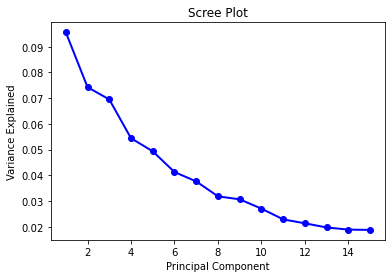

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(credit[ratio_name])
                        
#show PCA with all components
pca0 = PCA(n_components=15)
ori_pca = pca0.fit_transform(X)

#scree plot
PC_values = np.arange(pca0.n_components_) + 1
plt.plot(PC_values, pca0.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [37]:
#select n=13
pca = PCA(n_components=13) #first create a PCA model

Xpca = pca.fit_transform(X) #fit the PCA model with X

pca_names = ["PC"+str(i+1) for i in range(13)]
pca_df = pd.DataFrame(
    data = Xpca, 
    columns = pca_names)
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.859759 -0.406213 -0.753764  0.903540  0.179369  1.142941  0.352010   
1    -1.104884 -0.413861 -0.632842  1.156673 -0.115918  0.948291  0.267209   
2    -3.322414 -0.094079  1.132859 -0.088420 -0.588981 -0.137007  0.051854   
3    -3.323001 -0.095511  1.133852 -0.087447 -0.590546 -0.136164  0.049151   
4    -0.841511 -0.023263  1.810350 -0.453113  0.622613 -1.256160 -0.153846   
...        ...       ...       ...       ...       ...       ...       ...   
2164 -0.946381  0.163124  1.510475 -2.338472 -0.074015  0.461924  1.111966   
2165 -0.945749  0.165169  1.509457 -2.339457 -0.073047  0.460242  1.115887   
2166  0.164215 -1.715167  3.515242 -3.786282 -2.275395  5.492840 -6.047621   
2167  0.159342 -1.715776  3.517218 -3.782493 -2.279923  5.494564 -6.044957   
2168 -6.585211 -1.120659  0.596201 -3.281221  0.883175  0.737008 -1.561588   

           PC8       PC9       PC10      PC11      PC12      PC13  
0    -1.180265  0.169335   1.182824  1.150018 -0.227127 -0.379196  
1    -1.125141  0.224319   1.154704  1.157985 -0.358891 -0.361480  
2     2.076667 -1.353190  -0.281788 -0.086862 -0.520947 -0.783499  
3     2.075132 -1.353030  -0.282039 -0.087992 -0.514605 -0.784013  
4    -1.077054  0.813407  -0.078530 -0.833144  0.575599 -1.013097  
...        ...       ...        ...       ...       ...       ...  
2164 -1.226385  0.585599   0.648821 -0.187749 -0.518256  2.266727  
2165 -1.224058  0.585405   0.648160 -0.188302 -0.521592  2.266394  
2166  4.724832  5.943693  -1.860407  1.767093  1.085708  2.411747  
2167  4.719908  5.945064  -1.857758  1.769417  1.094804  2.410259  
2168  9.973985  0.109447  15.055252 -4.943659  0.198009  1.099733  

[2169 rows x 13 columns]